In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
#import pytest  Not Needed
#import yfinance as An import used to get the stock data from  yahoo finance but would not work for me
#import pandas_datareader as data Another import used to get the stock data from  yahoo finance but would not work for me

In [77]:
#Load the dataframe using pandas_datareader but this would not work for me 
#start = '2014-01-01'
#end = '2024-01-01'
#testMe=data.DataReader('AAPL', 'yahoo',start,end)


In [64]:
#Load the dataframe from csv files accquired from yahoofinance
#Change file directory for the stock data csv "GOOG" based off where it is located on your computer should be in the same file as LSTM model
myInfo = pd.read_csv ('c:\\Users\\Patron\\Desktop\\Stock Trend Prediction\\GOOG.csv')
myInfo.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-12,26.103832,26.436916,25.879448,26.423454,26.423454,38250730
1,2014-05-13,26.471823,26.730112,26.403011,26.581520,26.581520,33068541
2,2014-05-14,26.577032,26.577032,26.192589,26.260403,26.260403,23835261
3,2014-05-15,26.213032,26.221510,25.800165,25.927814,25.927814,34087331
4,2014-05-16,25.998121,26.018566,25.701437,25.960226,25.960226,29705333


In [17]:
myInfo.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2513,2024-05-06,169.220001,169.899994,167.889999,169.830002,169.830002,15147900
2514,2024-05-07,170.119995,173.470001,170.000000,172.979996,172.979996,21102400
2515,2024-05-08,170.750000,171.908997,170.522003,171.160004,171.160004,14569900
2516,2024-05-09,171.149994,172.440002,169.929993,171.580002,171.580002,11937700
2517,2024-05-10,169.690002,171.339996,167.910004,170.289993,170.289993,18726600


In [18]:
myInfo = myInfo.reset_index()
myInfo.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2014-05-12,26.103832,26.436916,25.879448,26.423454,26.423454,38250730
1,1,2014-05-13,26.471823,26.730112,26.403011,26.581520,26.581520,33068541
2,2,2014-05-14,26.577032,26.577032,26.192589,26.260403,26.260403,23835261
3,3,2014-05-15,26.213032,26.221510,25.800165,25.927814,25.927814,34087331
4,4,2014-05-16,25.998121,26.018566,25.701437,25.960226,25.960226,29705333


In [21]:
#Remove the irrelevant colummns
myNewInfo = myInfo.drop(['Date', 'Adj Close','index'], axis=1)
myNewInfo.head()

,Open,High,Low,Close,Volume
0,26.103832,26.436916,25.879448,26.423454,38250730
1,26.471823,26.730112,26.403011,26.581520,33068541
2,26.577032,26.577032,26.192589,26.260403,23835261
3,26.213032,26.221510,25.800165,25.927814,34087331
4,25.998121,26.018566,25.701437,25.960226,29705333


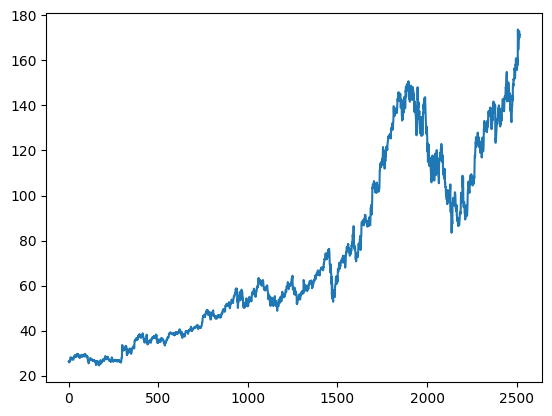

In [22]:
#Show the closing data
plt.plot(myNewInfo.Close)

In [23]:
myNewInfo

,Open,High,Low,Close,Volume
0,26.103832,26.436916,25.879448,26.423454,38250730
1,26.471823,26.730112,26.403011,26.581520,33068541
2,26.577032,26.577032,26.192589,26.260403,23835261
3,26.213032,26.221510,25.800165,25.927814,34087331
4,25.998121,26.018566,25.701437,25.960226,29705333
...,...,...,...,...,...
2513,169.220001,169.899994,167.889999,169.830002,15147900
2514,170.119995,173.470001,170.000000,172.979996,21102400
2515,170.750000,171.908997,170.522003,171.160004,14569900
2516,171.149994,172.440002,169.929993,171.580002,11937700


In [24]:
#Mean of moving average 100 days
ma100 = myNewInfo.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2513    147.7045
2514    148.0979
2515    148.4698
2516    148.8536
2517    149.2181
Name: Close, Length: 2518, dtype: float64

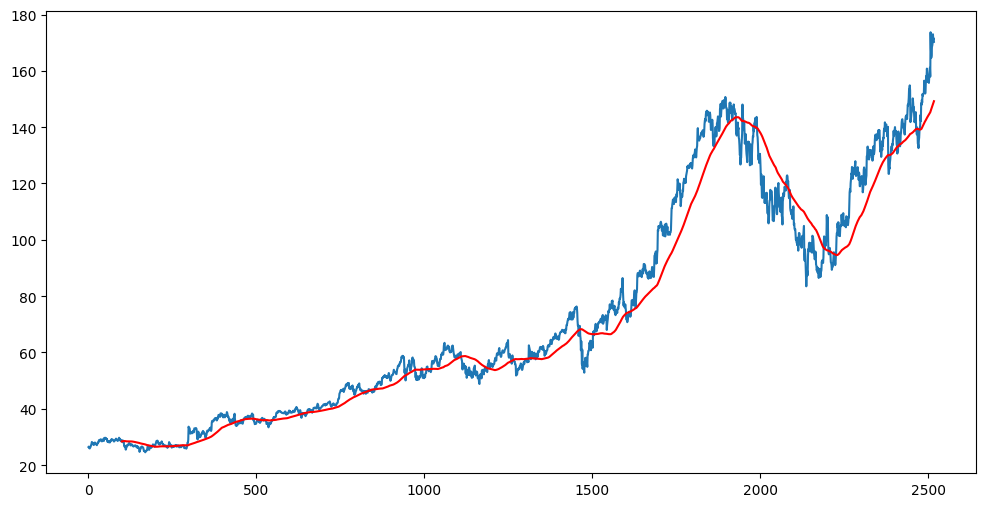

In [25]:
plt.figure(figsize= (12,6))
plt.plot(myInfo.Close)
plt.plot(ma100, 'r') #red colored line for 100 days moving average

In [26]:
#Mean of moving average 200 days
ma200 = myNewInfo.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2513    140.64515
2514    140.90850
2515    141.15490
2516    141.39885
2517    141.60200
Name: Close, Length: 2518, dtype: float64

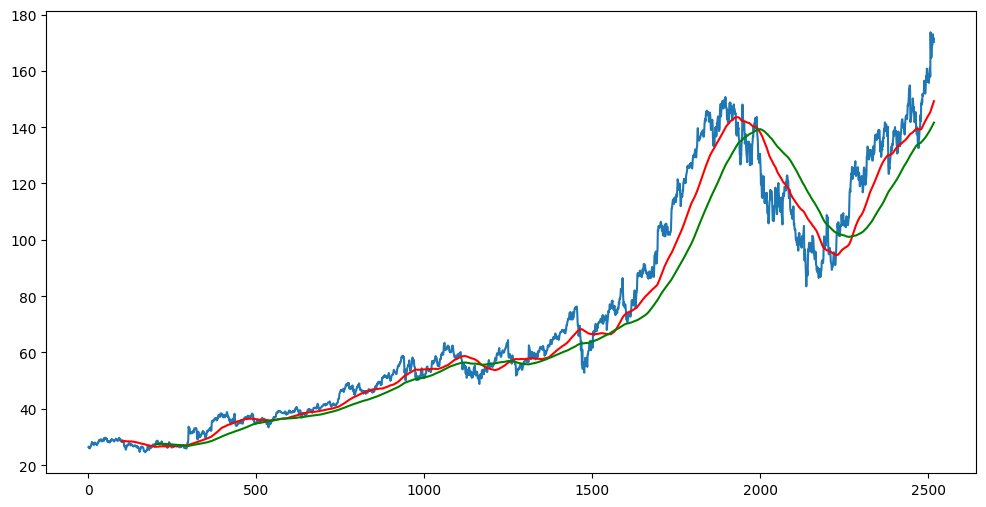

In [27]:
plt.figure(figsize= (12,6))
plt.plot(myInfo.Close)
plt.plot(ma100, 'r') #red colored line for 100 days moving average
plt.plot(ma200, 'g') #green colored line for 200 days moving average



In [28]:
myNewInfo.shape #dealing with x rows and 5 columns

(2518, 5)

In [29]:
#Splitting,Training, and Testing
training=pd.DataFrame(myNewInfo['Close'][0:int(len(myInfo)*0.70)])
testing=pd.DataFrame(myNewInfo['Close'][int(len(myInfo)*0.70): int(len(myInfo))])
print(testing.shape)
print(training.shape)

(756, 1)
(1762, 1)


In [30]:
#Split data into arrays 
scaler = MinMaxScaler(feature_range=(0,1))
trainingArray=scaler.fit_transform(training)
testingArray=scaler.fit_transform(testing)


array([[0.35419074],
       [0.31556544],
       [0.32825392],
       [0.35829268],
       [0.36120292],
       [0.35123616],
       [0.35416299],
       [0.3804268 ],
       [0.37433478],
       [0.40846457],
       [0.40979489],
       [0.42335364],
       [0.40615859],
       [0.4111752 ],
       [0.42129159],
       [0.41656323],
       [0.40732261],
       [0.43345895],
       [0.44140241],
       [0.45069293],
       [0.45543237],
       [0.47217297],
       [0.46792132],
       [0.47518844],
       [0.47165185],
       [0.46792132],
       [0.47539914],
       [0.4664911 ],
       [0.4763304 ],
       [0.48236692],
       [0.47640246],
       [0.48549887],
       [0.48231711],
       [0.48037144],
       [0.47149114],
       [0.46370291],
       [0.4753714 ],
       [0.50143009],
       [0.51309308],
       [0.51649112],
       [0.50650778],
       [0.51091456],
       [0.52188464],
       [0.5266575 ],
       [0.53871955],
       [0.52967289],
       [0.53609207],
       [0.507

In [31]:
#Train the data
x_train = []
y_train = []

for i in range(100, trainingArray.shape[0]):
    x_train.append(trainingArray[i-100:i])
    y_train.append(trainingArray[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape


(1662, 100, 1)

In [32]:
#Create a sequential model, defines a deep LSTM-based neural network and dropout regularization to prevent overfitting.
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(.2))
model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(.3))
model.add(LSTM(units = 80, activation= 'relu', return_sequences= True))
model.add(Dropout(.4))
model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(.5))

model.add(Dense(units= 1))

c:\Users\Patron\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - loss: 0.0465
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 0.0049
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 0.0045
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0039
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0032
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - loss: 0.0037
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0037
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - loss: 0.0031
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0029
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 0.0031
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0025
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0030
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0024
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0027
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step 

In [35]:
model.save('keras_model.h5')

In [36]:
testing.head()

,Close
1762,115.438004
1763,111.954002
1764,113.098503
1765,115.807999
1766,116.070503


In [37]:
past_100_days = training.tail(100)
print(past_100_days)

           Close
1662   88.388496
1663   88.150002
1664   87.394997
1665   86.550499
1666   86.968498
...          ...
1757  117.712502
1758  117.836998
1759  119.067497
1760  119.934502
1761  117.083000

[100 rows x 1 columns]


In [38]:
final_df=pd.concat([past_100_days, testing], ignore_index = True)
final_df.head()


,Close
0,88.388496
1,88.150002
2,87.394997
3,86.550499
4,86.968498


In [39]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.05430707],
       [0.05166301],
       [0.04329267],
       [0.03393016],
       [0.0385643 ],
       [0.02976724],
       [0.03468963],
       [0.03827604],
       [0.05891906],
       [0.04929045],
       [0.03864745],
       [0.04549893],
       [0.03239473],
       [0.0394235 ],
       [0.03630271],
       [0.06510537],
       [0.07616961],
       [0.05372506],
       [0.04254436],
       [0.04689582],
       [0.03901336],
       [0.03680159],
       [0.06710644],
       [0.12034371],
       [0.12275501],
       [0.12818736],
       [0.12727275],
       [0.13716188],
       [0.08924056],
       [0.10715636],
       [0.09198453],
       [0.12835364],
       [0.14285483],
       [0.22187919],
       [0.21761088],
       [0.23736145],
       [0.23453992],
       [0.22932927],
       [0.23590907],
       [0.23619183],
       [0.24074833],
       [0.25060978],
       [0.25416295],
       [0.24800446],
       [0.239102  ],
       [0.21900226],
       [0.22231707],
       [0.235

In [40]:
input_data.shape


(856, 1)

In [41]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print (y_test.shape)


(756, 100, 1)
(756,)


In [43]:
y_predicated=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step


In [44]:
y_predicated.shape

(756, 1)

In [45]:
y_test

array([0.35419074, 0.31556544, 0.32825392, 0.35829268, 0.36120292,
       0.35123616, 0.35416299, 0.3804268 , 0.37433478, 0.40846457,
       0.40979489, 0.42335364, 0.40615859, 0.4111752 , 0.42129159,
       0.41656323, 0.40732261, 0.43345895, 0.44140241, 0.45069293,
       0.45543237, 0.47217297, 0.46792132, 0.47518844, 0.47165185,
       0.46792132, 0.47539914, 0.4664911 , 0.4763304 , 0.48236692,
       0.47640246, 0.48549887, 0.48231711, 0.48037144, 0.47149114,
       0.46370291, 0.4753714 , 0.50143009, 0.51309308, 0.51649112,
       0.50650778, 0.51091456, 0.52188464, 0.5266575 , 0.53871955,
       0.52967289, 0.53609207, 0.5073614 , 0.52784369, 0.54446224,
       0.55253332, 0.60228374, 0.62255544, 0.59098108, 0.58638026,
       0.58814298, 0.57351433, 0.58203439, 0.58525497, 0.58246677,
       0.59257208, 0.5936363 , 0.60434588, 0.60539353, 0.60088136,
       0.60864186, 0.6088249 , 0.61447893, 0.59656881, 0.58847014,
       0.59227824, 0.60916847, 0.63868628, 0.65308757, 0.65920

In [46]:
y_predicated

array([[0.4147464 ],
       [0.4143821 ],
       [0.41061372],
       [0.40370712],
       [0.39529702],
       [0.38701588],
       [0.37977242],
       [0.3740164 ],
       [0.3703997 ],
       [0.36919457],
       [0.3709057 ],
       [0.37559038],
       [0.38289034],
       [0.39176947],
       [0.4012149 ],
       [0.41059697],
       [0.41933468],
       [0.42674142],
       [0.4330797 ],
       [0.43879667],
       [0.44434118],
       [0.44997764],
       [0.45602095],
       [0.46239126],
       [0.46894747],
       [0.47536135],
       [0.48119056],
       [0.48625225],
       [0.4902516 ],
       [0.4932546 ],
       [0.49554986],
       [0.4972391 ],
       [0.49860644],
       [0.49976528],
       [0.50068915],
       [0.50109375],
       [0.50061536],
       [0.49949384],
       [0.49880725],
       [0.49946773],
       [0.5018563 ],
       [0.50564426],
       [0.5103446 ],
       [0.5156624 ],
       [0.5213651 ],
       [0.52740383],
       [0.53340423],
       [0.539

In [56]:
scale_value=scaler.scale_
print(scale_value)


[0.01108647]


In [59]:
scale_factor = 1/scale_value
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor


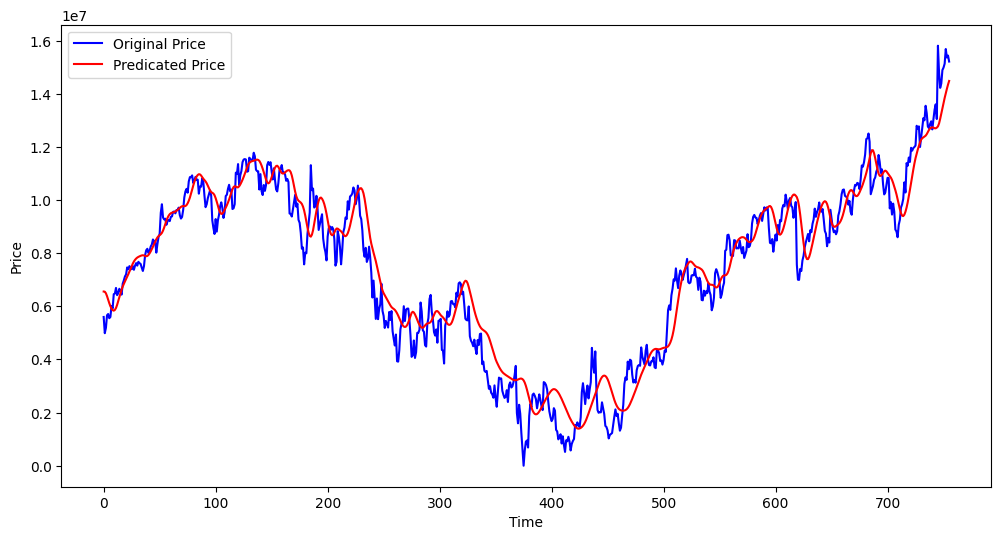

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicated, 'r', label = 'Predicated Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()